# 12.1 감정분석 방법과 환경설정

사람의 정서적 상태와 주관적 정보를 체계적으로 식별, 추출하는 연구

* 로지스틱 회귀 방법에 의한 분석
* 딥러닝 방법에 의한 분석

In [1]:
# 폰트 설치
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt install fonts-nanum fonts-nanum-extra
mpl.font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-extra
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 31.4 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 31.4 MB in 1s (30.2 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (202

In [2]:
# 형태소분석기
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 7.5 MB/s eta 0:00:00


# 12.2 데이터 준비 및 전처리

## 12.2.1 데이터 준비

In [3]:
# Tripadvisor 여행사이트에서 "제주 호텔"로 검색해서 나온 리뷰들을 종합한 내용입니다. (평점, 평가 내용 포함)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/byungjooyoo/Dataset/main/hotel_review.csv")
# 전체 데이터 확인
print(df.shape)
print(df.info())
df.head()

(1001, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1001 non-null   int64 
 1   text    1001 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


rating    0
text      0
dtype: int64
rating
5    386
4    340
3    155
1     65
2     55
Name: count, dtype: int64


<Axes: >

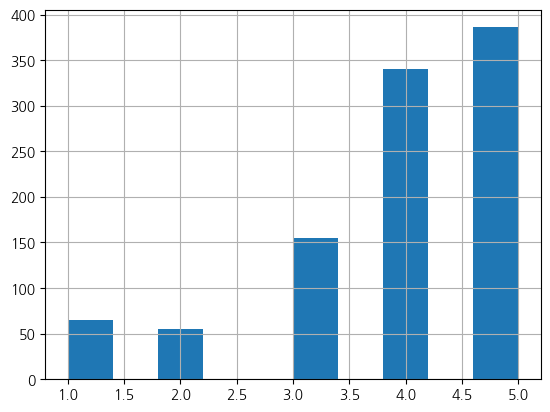

In [4]:
# 결측치 확인
print(df.isnull().sum())
# 점수별 현황
print(df['rating'].value_counts())
df['rating'].hist()

In [5]:
# 점수를 기준으로 긍정(4,5)과 부정(1-3)으로 변환
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0

df['y'] = df['rating'].apply(lambda x: rating_to_label(x))
# 긍정 및 부정평가 댓글 수
df["y"].value_counts()

y
1    726
0    275
Name: count, dtype: int64

## 12.2.2 데이터 전처리

In [6]:
# 영문 nltk에서 불용어 처리
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# 불용어 사전 다운로드
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/ko_stopwords.txt
with open("ko_stopwords.txt", 'r') as f:
    stopwords = []
    for line in f.readlines():
        stopwords.append(line.strip())
print(len(stopwords))
stopwords[:10]

--2024-05-11 23:39:22--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/ko_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6944 (6.8K) [text/plain]
Saving to: ‘ko_stopwords.txt’

ko_stopwords.txt    100%[===================>]   6.78K  --.-KB/s    in 0s      

2024-05-11 23:39:22 (52.1 MB/s) - ‘ko_stopwords.txt’ saved [6944/6944]

668


['아', '휴', '어', '나', '따라', '의해', '을', '를', '에', '의']

In [8]:
# 불용어 사전 사용법
text = '휴 감정분석 을 준비하고 있습니다.'
para = text.split()
[x for x in para if x not in stopwords]

['감정분석', '준비하고', '있습니다.']

In [9]:
# 불용어 추가
hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
stopwords = stopwords+hotel_stopwords
stopwords[-10:]

['아홉', '령', '영', '제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']

In [10]:
# df로 말뭉치로 만들면서 doc0은 부정, doc1은 긍정인 두개의 문서로 만듬
import konlpy
tagger = konlpy.tag.Okt()

tokens=[]
corpus =[]
for i, sentence in enumerate(df['text']):
    para = tagger.nouns(sentence)
    para = [x for x in para if x not in stopwords]
    para = [x for x in para if len(x) > 1]
    tokens.append(para)
    corpus.append(' '.join(para))

print(corpus[:5])
print(tokens[:5])


['집중 휴식 제공 위치 선정 청소 청결 상태', '침대 이불 침구 교체 어메니티 보강 베스트 웨스턴 회원 경우 객실 층수 요청 적극 반영', '지인 소개 처음 당황 세면 도구 잠옷 필수 그것', '정도 처음 박만', '저녁 맥주 한잔 렌트 뚜벅 버스 정류 도착 가방 일찍 정비 방이 입실 업그레이드 직원 정말']
[['집중', '휴식', '제공', '위치', '선정', '청소', '청결', '상태'], ['침대', '이불', '침구', '교체', '어메니티', '보강', '베스트', '웨스턴', '회원', '경우', '객실', '층수', '요청', '적극', '반영'], ['지인', '소개', '처음', '당황', '세면', '도구', '잠옷', '필수', '그것'], ['정도', '처음', '박만'], ['저녁', '맥주', '한잔', '렌트', '뚜벅', '버스', '정류', '도착', '가방', '일찍', '정비', '방이', '입실', '업그레이드', '직원', '정말']]


## 12.2.3 탐색적 데이터 분석(EDA)

In [11]:
# 긍정 평가와 부정평가 토큰을 분리하여 저장
tokens_p, tokens_n = [],[]
for i, token in enumerate(tokens):
  # if i>5:
  #   break
  if df['y'].values[i]== 1:  # 주의 : df['y'][i] 값을 사용하면 기존 index가 참조되어서 값이 다름
    tokens_p.append(token)
  else :
    tokens_n.append(token)

print(tokens_p)
print(tokens_n)

[['집중', '휴식', '제공', '위치', '선정', '청소', '청결', '상태'], ['침대', '이불', '침구', '교체', '어메니티', '보강', '베스트', '웨스턴', '회원', '경우', '객실', '층수', '요청', '적극', '반영'], ['지인', '소개', '처음', '당황', '세면', '도구', '잠옷', '필수', '그것'], ['정도', '처음', '박만'], ['저녁', '맥주', '한잔', '렌트', '뚜벅', '버스', '정류', '도착', '가방', '일찍', '정비', '방이', '입실', '업그레이드', '직원', '정말'], ['손님', '가장', '바다', '배치', '대해', '대응', '써비스', '조식', '부분', '신경', '아주', '특급', '트랜디', '대해', '고민', '흔적', '여름', '수영장', '사용', '보고'], ['엄마', '가격', '대비', '위치', '주위', '마트', '식당', '시장', '바다', '방문', '의사'], ['정해진', '휘슬', '처음', '공항', '생각', '시설', '직원', '친절', '모드', '마지막', '마무리', '테라스', '전경', '인근', '재래시장', '야시장', '이용도', '이용'], ['휘슬락', '체크', '주변', '여친', '추억', '가성', '분위기', '추천', '후회'], ['예전', '그랜드', '저희', '돌잔치', '다정', '했었더랬', '아주', '전통', '메종', '글래드', '업그레이드', '위치', '시설', '서비스', '매우', '합리', '가격', '대의', '저희', '명절', '글래드', '숙박', '아티', '백미', '커피', '베이커리', '저희', '가족', '플러스'], ['지금', '이용', '메종', '글래드', '가장', '공항', '접근성', '쇼핑', '조식', '만족도', '최고', '직원', '기억', '가족', '메종', '찾기'], ['엄마', '침구', '직원'

In [12]:
# counter 함수에 넣기위한 전처리 : 토큰단위 리스트로
corpus_n, corpus_p = [], []
for token in tokens_p:
  corpus_p.append(' '.join(token))
for token in tokens_n:
  corpus_n.append(' '.join(token))
# 모든 리뷰를 긍정 부정 하나의 corpus로 합치기
corpus_p1 = ' '.join(corpus_p).split()
corpus_n1 = ' '.join(corpus_n).split()
print(corpus_p1)

['집중', '휴식', '제공', '위치', '선정', '청소', '청결', '상태', '침대', '이불', '침구', '교체', '어메니티', '보강', '베스트', '웨스턴', '회원', '경우', '객실', '층수', '요청', '적극', '반영', '지인', '소개', '처음', '당황', '세면', '도구', '잠옷', '필수', '그것', '정도', '처음', '박만', '저녁', '맥주', '한잔', '렌트', '뚜벅', '버스', '정류', '도착', '가방', '일찍', '정비', '방이', '입실', '업그레이드', '직원', '정말', '손님', '가장', '바다', '배치', '대해', '대응', '써비스', '조식', '부분', '신경', '아주', '특급', '트랜디', '대해', '고민', '흔적', '여름', '수영장', '사용', '보고', '엄마', '가격', '대비', '위치', '주위', '마트', '식당', '시장', '바다', '방문', '의사', '정해진', '휘슬', '처음', '공항', '생각', '시설', '직원', '친절', '모드', '마지막', '마무리', '테라스', '전경', '인근', '재래시장', '야시장', '이용도', '이용', '휘슬락', '체크', '주변', '여친', '추억', '가성', '분위기', '추천', '후회', '예전', '그랜드', '저희', '돌잔치', '다정', '했었더랬', '아주', '전통', '메종', '글래드', '업그레이드', '위치', '시설', '서비스', '매우', '합리', '가격', '대의', '저희', '명절', '글래드', '숙박', '아티', '백미', '커피', '베이커리', '저희', '가족', '플러스', '지금', '이용', '메종', '글래드', '가장', '공항', '접근성', '쇼핑', '조식', '만족도', '최고', '직원', '기억', '가족', '메종', '찾기', '엄마', '침구', '직원', '교통', '이틀', '정원', '거기

In [13]:
# 빈도 탐색
from collections import Counter
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)
print(counter_p.most_common(10))
print(counter_n.most_common(10))

[('위치', 253), ('공항', 231), ('매우', 191), ('직원', 177), ('가격', 175), ('시설', 166), ('객실', 160), ('조식', 140), ('바다', 132), ('이용', 130)]
[('직원', 90), ('객실', 84), ('침대', 76), ('공항', 75), ('위치', 75), ('매우', 74), ('가격', 70), ('예약', 67), ('시설', 49), ('아침', 48)]


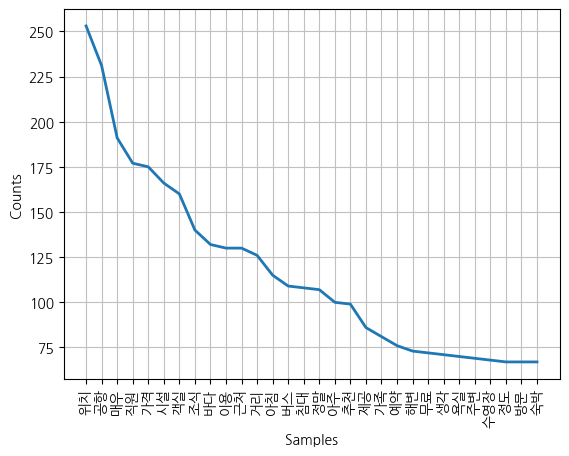

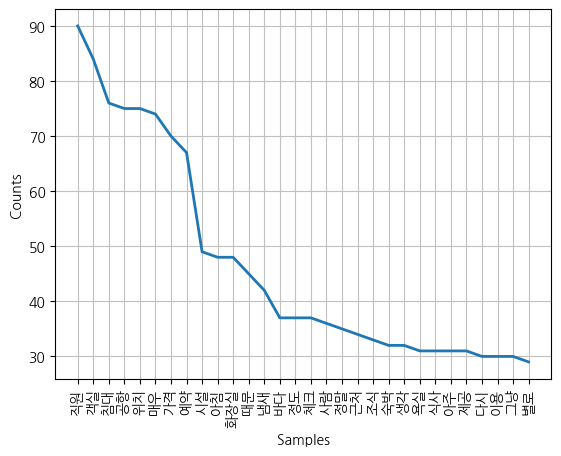

In [14]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(corpus_p1)
neg = nltk.Text(corpus_n1)
plt.rc('font', family='NanumGothic')

plt.figure(1)
pos.plot(30)

plt.figure(2)
neg.plot(30)
plt.show()

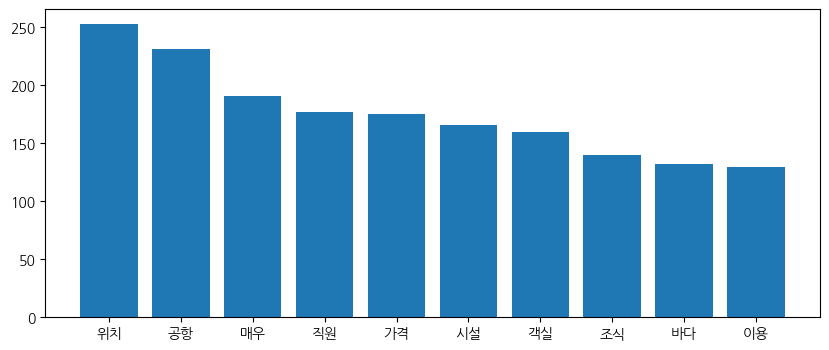

In [15]:
top_10 = counter_p.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

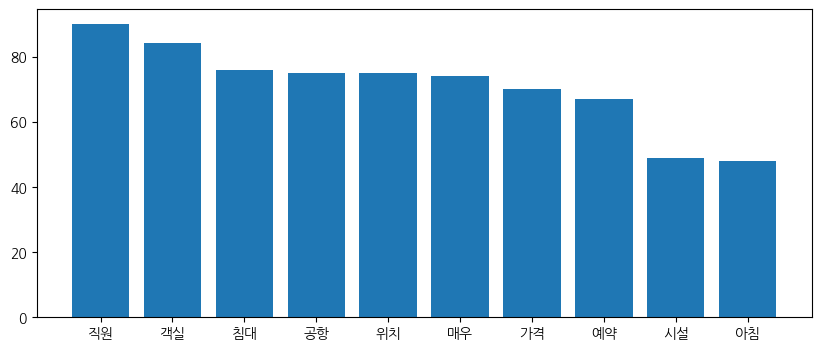

In [16]:
top_10 = counter_n.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

In [17]:
# DTM 구하기, corpus 문서단위 * 단어사전 3482개 매트릭스
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)

(1001, 3482)


,상태,선정,위치,제공,집중,청결,청소,휴식,객실,경우,...,사건,사람과,위협,재판,침묵,오른,악몽,퍼팅,규칙,더러
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
999,0,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [18]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf = tfidf_vectorizer.fit_transform(dtm).toarray()
col = g_dictionary.token2id.keys()
print(tf_idf.shape)
pd.DataFrame(tf_idf, columns=col)

(1001, 3482)


,상태,선정,위치,제공,집중,청결,청소,휴식,객실,경우,...,사건,사람과,위협,재판,침묵,오른,악몽,퍼팅,규칙,더러
0,0.302641,0.504836,0.159395,0.237769,0.504836,0.331005,0.266906,0.36871,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.121768,0.191480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.000000,0.000000,0.000000,0.226321,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000
997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.305068,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.30181,0.30181,0.000000,0.000000
999,0.000000,0.000000,0.119135,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.188663,0.188663


변환 후 1001*3482 matrix가 출력됩니다. 여기서

한 행(row)은 한 리뷰를 의미하고

한 열(column)은 한 단어를 의미합니다.


In [19]:
# id_to_word 단어사전 만들기
print(vector.vocabulary_)
id_to_word = {v: k for k, v in vector.vocabulary_.items()}
print(id_to_word)
print(id_to_word[10])

{'상태': 0, '선정': 1, '위치': 2, '제공': 3, '집중': 4, '청결': 5, '청소': 6, '휴식': 7, '객실': 8, '경우': 9, '교체': 10, '반영': 11, '베스트': 12, '보강': 13, '어메니티': 14, '요청': 15, '웨스턴': 16, '이불': 17, '적극': 18, '층수': 19, '침구': 20, '침대': 21, '회원': 22, '그것': 23, '당황': 24, '도구': 25, '세면': 26, '소개': 27, '잠옷': 28, '지인': 29, '처음': 30, '필수': 31, '박만': 32, '정도': 33, '가방': 34, '도착': 35, '뚜벅': 36, '렌트': 37, '맥주': 38, '방이': 39, '버스': 40, '업그레이드': 41, '일찍': 42, '입실': 43, '저녁': 44, '정류': 45, '정말': 46, '정비': 47, '직원': 48, '한잔': 49, '대명': 50, '바다': 51, '분위기': 52, '실내': 53, '전망': 54, '전일': 55, '콘도': 56, '함덕': 57, '가장': 58, '고민': 59, '대응': 60, '대해': 61, '배치': 62, '보고': 63, '부분': 64, '사용': 65, '손님': 66, '수영장': 67, '신경': 68, '써비스': 69, '아주': 70, '여름': 71, '조식': 72, '트랜디': 73, '특급': 74, '흔적': 75, '가격': 76, '대비': 77, '마트': 78, '방문': 79, '시장': 80, '식당': 81, '엄마': 82, '의사': 83, '주위': 84, '공항': 85, '마무리': 86, '마지막': 87, '모드': 88, '생각': 89, '시설': 90, '야시장': 91, '이용': 92, '이용도': 93, '인근': 94, '재래시장': 95, '전경': 96, '정해진': 97, '친절': 98, '

# 12.3 로지스틱 회귀모형에 의한 감정분석

## 12.3.1 모형의 적합과 예측 정확도 평가

In [20]:
# 전체 데이터를 train 데이터 70%, test 데이터 30%로 분리
from sklearn.model_selection import train_test_split
X = tf_idf
y=df['y']
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=256)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(700, 3482) (700,) (301, 3482) (301,)


Accuracy: 0.74 , Precision: 0.74 , Recall: 1.00 , F1: 0.85


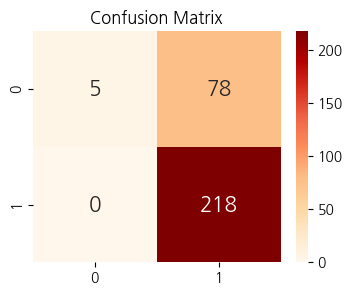

In [21]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pandas as pd

# 모형 적합과 예측
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)
# 시험용데이터 예측결과 정확도
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r =recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('Accuracy: %.2f' % a,', Precision: %.2f' % p, ', Recall: %.2f' % r, ', F1: %.2f' % f1 )
tr1 = pd.DataFrame([a, p, r, f1])

# 추정결과 confusion matrix
c_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(c_mat, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

## 12.3.2 불균형 데이터의 과적합을 해소하기 위한 모형 개선

In [22]:
# under-sampling 방법으로 불균형 해소
print(y.value_counts())
positive_random_idx = y[y==1].sample(275, random_state=12).index.tolist()
negative_random_idx = y[y==0].sample(275, random_state=12).index.tolist()
random_idx = positive_random_idx + negative_random_idx
# 밸런스 데이터 추출
bal_x = X[random_idx]
bal_y = y[random_idx]
x_train, x_test, y_train, y_test = train_test_split(bal_x, bal_y, test_size=0.25, random_state=1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

y
1    726
0    275
Name: count, dtype: int64
(412, 3482) (412,) (138, 3482) (138,)


Accuracy: 0.72 , Precision: 0.70 , Recall: 0.76 , F1: 0.73


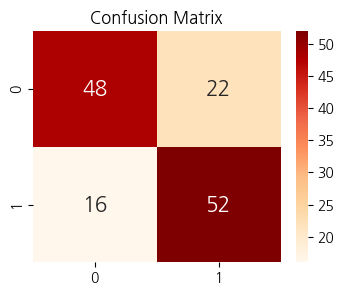

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# 모형 적합과 예측
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)
# 시험용데이터 예측결과 정확도
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r =recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('Accuracy: %.2f' % a,', Precision: %.2f' % p, ', Recall: %.2f' % r, ', F1: %.2f' % f1 )
tr2 = pd.DataFrame([a, p, r, f1])

# 추정결과 confusion matrix
c_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(c_mat, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# 추정 결과 분류 정확도 비교 test_result
pd.options.display.float_format = '{:.2f}'.format
test_result = pd.concat([tr1.T, tr2.T], axis=0)
test_result.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1 Score']
test_result.index = ['1차 Imbalance Data', '2차 Under-sampling']
test_result

,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1 Score
1차 Imbalance Data,0.74,0.74,1.00,0.85
2차 Under-sampling,0.72,0.70,0.76,0.73


## 12.3.3 긍정 및 부정 키워드 분석

[[ 0.14062648  0.22161756  0.22479878 ... -0.09595671 -0.05626466
  -0.05626466]]


<BarContainer object of 3482 artists>

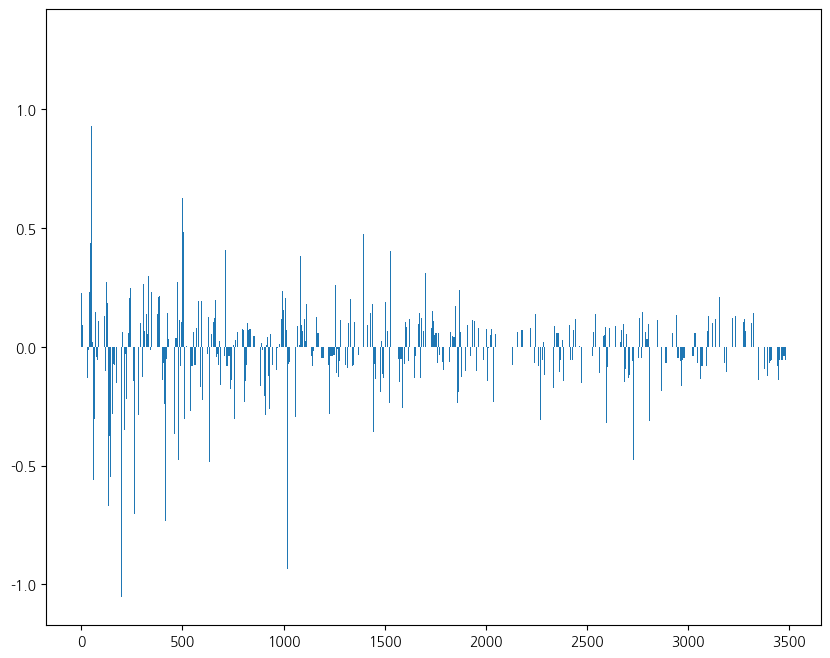

In [25]:
# 긍정/부정 키워드 추출 긍 / 부정 키워드를 추출 coeficient를 시각화
print(lr2.coef_)
plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [26]:
# 중요 단어의 추정 계수와 인덱스 번호를 tuple형태로 반환함
coef_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index = coef_index[-10:]
coef_neg_index = coef_index[:10]
print(coef_pos_index[-3:])
print(coef_neg_index [:3])
print('긍정리뷰 키워드: ', id_to_word[79],id_to_word[92])
print('부정리뷰 키워드: ', id_to_word[199],id_to_word[1020])

[(0.9277158893395646, 51), (0.9323837469851255, 92), (1.3031469499290942, 79)]
[(-1.0544208052438804, 199), (-0.9339534144348095, 1020), (-0.8018027620163549, 21)]
긍정리뷰 키워드:  방문 이용
부정리뷰 키워드:  예약 냄새


## 12.3.4 분석결과 시각화

In [27]:
#  index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 10개씩 Top 20 단어를 출력
pos_top_word=[]
pos_top_score=[]
for coef in coef_pos_index:
    print(id_to_word[coef[1]], coef[0])
    pos_top_word.append(id_to_word[coef[1]])
    pos_top_score.append(coef[0])

neg_top_word=[]
neg_top_score=[]
for coef in coef_neg_index:
    print(id_to_word[coef[1]], coef[0])
    neg_top_word.append(id_to_word[coef[1]])
    neg_top_score.append(coef[0])

마음 0.6980001844955054
맛집 0.7247566557656028
사장 0.7634150124617936
최고 0.7785902969112882
가족 0.8990208672535015
조식 0.9037193676700884
가성 0.9147421078636083
바다 0.9277158893395646
이용 0.9323837469851255
방문 1.3031469499290942
예약 -1.0544208052438804
냄새 -0.9339534144348095
침대 -0.8018027620163549
보이 -0.7438975392033557
최악 -0.732725634402209
별로 -0.7056964127414649
에어컨 -0.6950756324367247
찾기 -0.6720141528426056
취소 -0.667289477256053
사람 -0.6534806959434282


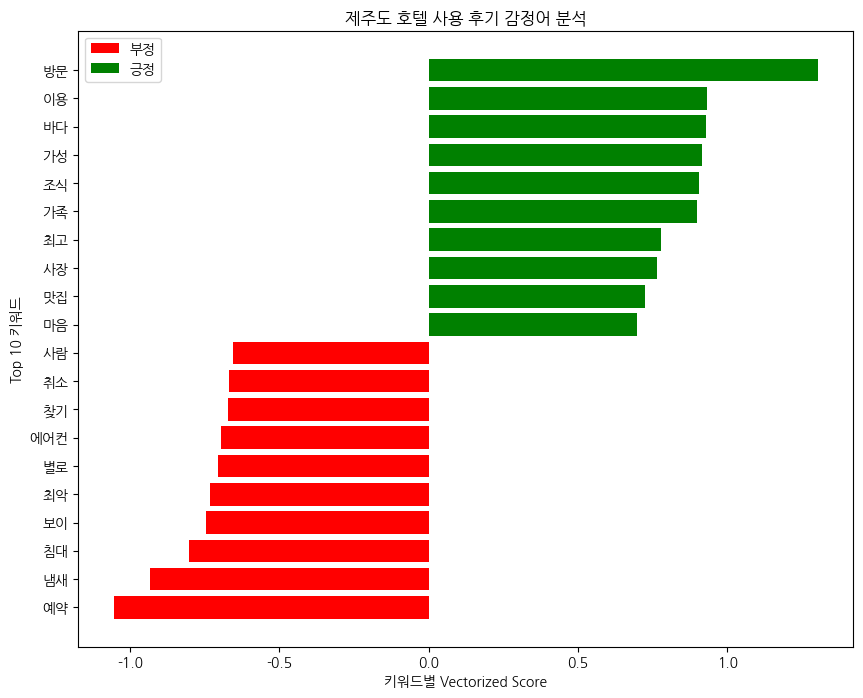

In [28]:
# 감정분석 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 8])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xlabel('키워드별 Vectorized Score')
plt.ylabel('Top 10 키워드')
# Giving the tilte for the plot
plt.title('제주도 호텔 사용 후기 감정어 분석')
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

이용객들이 보통 제주 호텔의 바다뷰 혹은 바다 접근성, 주변 맛집 그리고 인테리어 등에 만족하는 것으로 보입니다.
하지만 숙소의 냄새 그리고 침대, 에어컨 등 시설의 상태가 많이 아쉬워 보이고 개선이 필요해보입니다.